In [36]:
import pandas as pd

# Read the CSV file into a Pandas DataFrame
pandamics_df = pd.read_csv("Pandamics_All_The_Time.csv")

# Function to convert Death toll to a numeric value with two decimal places
def death_toll_to_severity(death_toll):
    if death_toll.endswith("M"):
        return round(float(death_toll.strip("M")) * 1e6, 2)
    elif death_toll.endswith("+"):
        return round(float(death_toll.strip("+")), 2)
    elif "-" in death_toll:
        min_value, max_value = death_toll.split("-")
        average = (float(min_value) + float(max_value)) / 2
        return round(average, 2)
    else:
        return round(float(death_toll.replace(",", "")), 2)

# Apply the function to create a new 'Severity' column
pandamics_df['Severity'] = pandamics_df['Death toll'].apply(death_toll_to_severity)

# Convert "Started Year" to a numeric column
pandamics_df['Started Year'] = pd.to_numeric(pandamics_df['Started Year'], errors='coerce')

# Filter the DataFrame for records between 1984 and 2023
filtered_df = pandamics_df[(pandamics_df['Started Year'] >= 1981) & (pandamics_df['Started Year'] <= 2023)]

# Select and display only the specified columns
selected_columns = filtered_df[['Started Year', 'Started Month', 'End Year', 'End Month', 'Severity']]
# Sort the DataFrame based on the specified columns
selected_columns = selected_columns.sort_values(by=['Started Year', 'Started Month', 'End Year', 'End Month'])

# Display the sorted DataFrame
print(selected_columns)

    Started Year  Started Month  End Year  End Month    Severity
14          1981            6.0      2023       10.0  28000000.0
16          2002           11.0      2003        7.0       770.0
15          2009            1.0      2010        8.0    200000.0
18          2012            6.0      2023       10.0       850.0
17          2014            3.0      2022       11.0     11000.0
19          2019           12.0      2023       10.0   6900000.0


In [35]:
# Create an empty DataFrame for the result
result_df = pd.DataFrame(columns=["Year", "Month", "Severity"])

for index, row in filtered_df.iterrows():
    start_year = int(row["Started Year"])
    start_month = int(row["Started Month"])
    end_year = int(row["End Year"])
    end_month = int(row["End Month"])
    severity = row["Severity"]
    
    # Calculate the number of months within the date range
    num_months = (end_year - start_year) * 12 + (end_month - start_month) + 1
    
    # Calculate the adjusted "Severity" for each month
    monthly_severity = round(severity / num_months, 2)
    
    # Create rows for each month within the date range
    for year in range(start_year, end_year + 1):
        for month in range(1, 13):
            if (year == start_year and month < start_month) or (year == end_year and month > end_month):
                continue
            result_df = result_df.append({"Year": year, "Month": month, "Severity": monthly_severity}, ignore_index=True)

# Group the result DataFrame by Year and Month, and sum the Severity
grouped_result = result_df.groupby(["Year", "Month"])["Severity"].sum().reset_index()

# Convert "Year" and "Month" columns to integers and remove decimal points
grouped_result['Year'] = grouped_result['Year'].astype(int)
grouped_result['Month'] = grouped_result['Month'].astype(int)

# Export the grouped result to a CSV file
grouped_result.to_csv("pandamics_data_1981-2023.csv", index=False)

/var/folders/kp/bgyrqb3s3n19yxcx2cyqppwh0000gn/T/ipykernel_3993/2910414816.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({"Year": year, "Month": month, "Severity": monthly_severity}, ignore_index=True)
/var/folders/kp/bgyrqb3s3n19yxcx2cyqppwh0000gn/T/ipykernel_3993/2910414816.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({"Year": year, "Month": month, "Severity": monthly_severity}, ignore_index=True)
/var/folders/kp/bgyrqb3s3n19yxcx2cyqppwh0000gn/T/ipykernel_3993/2910414816.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({"Year": year, "Month": month, "Severity": monthly_severity}, ignore_index=True)
/var/folders/kp/bgy

In [37]:
import pandas as pd
import os

# Initialize an empty list to store the dataframes
dataframes = []

# Specify the directory containing the CSV files
directory_path = "../../CSE_DATA/SHARE_CHANGE/"

filenames = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the data
data = pd.DataFrame()

# Loop through the CSV files and read them into DataFrames
for file in filenames:
    df = pd.read_csv(file)
    # Extract the label from the file name and remove the '.csv' extension
    label = os.path.basename(file).replace('.csv', '')
    # Add the label as a new column
    df['Label'] = label
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Filter out data associated with the label 'SWAD.N0000'
combined_df = combined_df[combined_df['Label'] != 'SWAD.N0000']

# Convert 'Trade Date' to datetime format
combined_df['Trade Date'] = pd.to_datetime(combined_df['Trade Date'], format='%m/%d/%y')

# Extract 'Month' and 'Year' from 'Trade Date'
combined_df['Month'] = combined_df['Trade Date'].dt.month
combined_df['Year'] = combined_df['Trade Date'].dt.year

# Select the columns 'Label', 'Month', 'Year', and 'Close (Rs.)'
selected_columns = ['Label', 'Month', 'Year', 'Close (Rs.)']

# Group by 'Label', 'Month', and 'Year' and calculate the mean value of 'Close (Rs.)'
result_df = combined_df[selected_columns].groupby(['Label', 'Month', 'Year']).mean().reset_index()

# Sort the DataFrame by 'Year' and 'Month'
result_df = result_df.sort_values(by=['Year', 'Month'])

# Reset the index for the result DataFrame
result_df = result_df.reset_index(drop=True)

print(result_df)

            Label  Month  Year  Close (Rs.)
0       JKH.N0000      8  1986     0.000000
1       SUN.N0000      3  1990    12.500000
2      GREG.N0000      4  1990     0.500000
3      SELI.N0000      1  1991   550.000000
4      SHAL.N0000      2  1991   575.000000
...           ...    ...   ...          ...
40419  VPEL.N0000     10  2023     6.850000
40420  WAPO.N0000     10  2023    31.410000
40421  WATA.N0000     10  2023    74.180000
40422  WIND.N0000     10  2023    18.620000
40423  YORK.N0000     10  2023   161.357143

[40424 rows x 4 columns]


In [39]:
# Merge the result_df with the grouped_result DataFrame based on 'Year' and 'Month'
merged_df = result_df.merge(grouped_result, on=['Year', 'Month'], how='left')

# Fill missing values in 'Severity' with 0.00
merged_df['Severity'] = merged_df['Severity'].fillna(0.00)

# Print the updated DataFrame
print(merged_df)

# Export the updated DataFrame to a CSV file
merged_df.to_csv("pandamics_vs_share_value.csv", index=False)

            Label  Month  Year  Close (Rs.)   Severity
0       JKH.N0000      8  1986     0.000000   55009.82
1       SUN.N0000      3  1990    12.500000   55009.82
2      GREG.N0000      4  1990     0.500000   55009.82
3      SELI.N0000      1  1991   550.000000   55009.82
4      SHAL.N0000      2  1991   575.000000   55009.82
...           ...    ...   ...          ...        ...
40419  VPEL.N0000     10  2023     6.850000  201824.53
40420  WAPO.N0000     10  2023    31.410000  201824.53
40421  WATA.N0000     10  2023    74.180000  201824.53
40422  WIND.N0000     10  2023    18.620000  201824.53
40423  YORK.N0000     10  2023   161.357143  201824.53

[40424 rows x 5 columns]


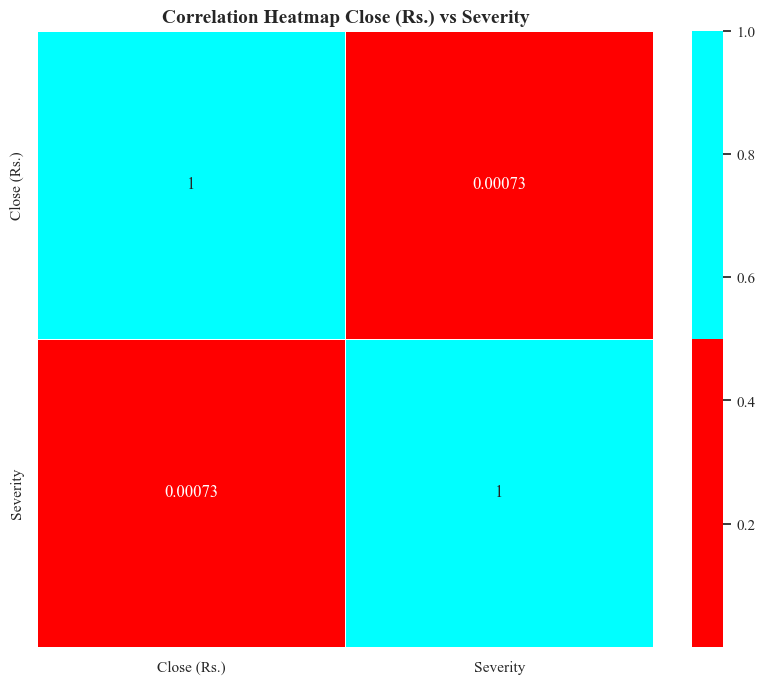

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your DataFrame
data = pd.read_csv('./final_pandamics_vs_stock_values.csv')

df = pd.DataFrame(data)

# Select the columns you want for the heatmap
columns = ['Close (Rs.)', 'Severity']

# Create a correlation matrix
corr_matrix = df[columns].corr()

# Create custom color palette with "Close (Rs.)" in red and "Loan Rate" in green
colors = ['red', 'cyan']
cmap = sns.color_palette(colors, as_cmap=True)

# Set the font style to Times New Roman
sns.set(style="white", font='Times New Roman')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap=cmap, linewidths=0.5, square=True)
plt.title('Correlation Heatmap Close (Rs.) vs Severity', fontweight='bold', fontsize=14)
plt.show()